In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as mth
from mpl_toolkits.mplot3d import Axes3D

Idea nueva: Basandome en que se laburar bien con ecuaciones diferenciales ordinarias, en vez de tener un vector para mi funcion voy a tener una matriz porque me muevo en tiempo y espacio, voy a hacer cosas parecidas en el sentido de discretizacion pero ahora laburo con derivadas segundas y en el espacio. A cada corte de tiempo veo la funcion para cada posicion en ese instante de tiempo, y a cada corte de espacio veo la funcion para cada momento en ese lugar del espacio.

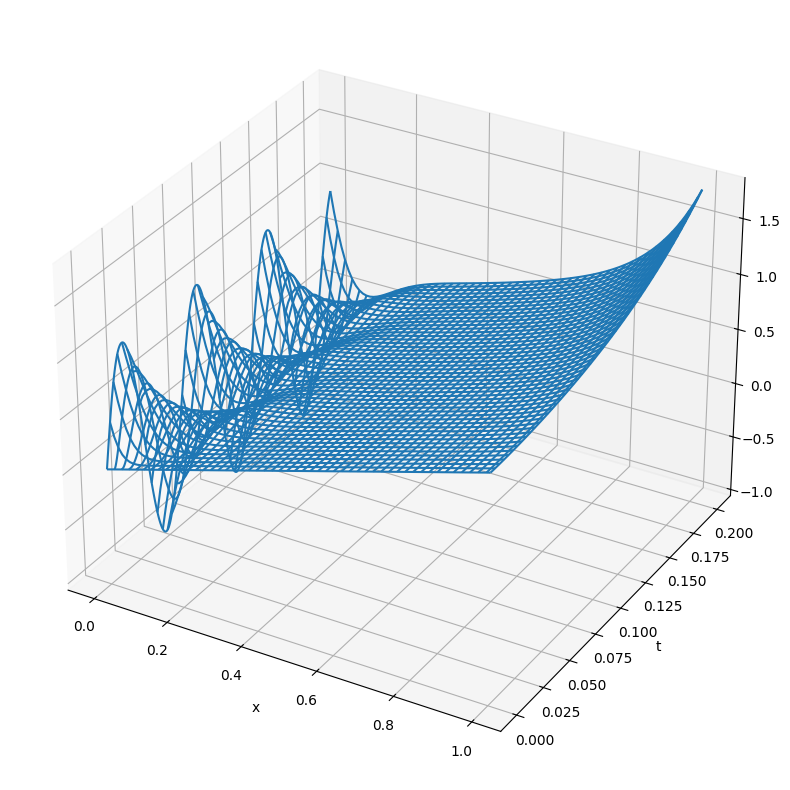

In [ ]:
# N tiempo, M espacio

M = 100 # number of grid points for space interval
N = 1000 # number of grid points for time interval

x0 = 0 
xL = 1 # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 0.2

dt = (tF - t0) / (N - 1)

D = 0.2 # thermal diffusivity

a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)

# Initial matrix solution
U = np.zeros((M, N))

# Initial condition
U[:, 0] = xspan
# Condiciones contorno, una de Dirichlet y una Von Neumann
U[0, :] = np.sin(100*tspan)

# El algoritmo de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]
    U[-1, k+1] = U[-2, k+1] + dx*np.exp(10*tspan[k+1]) # Condicion Von Neumann

Tspan, Xspan = np.meshgrid(tspan, xspan)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

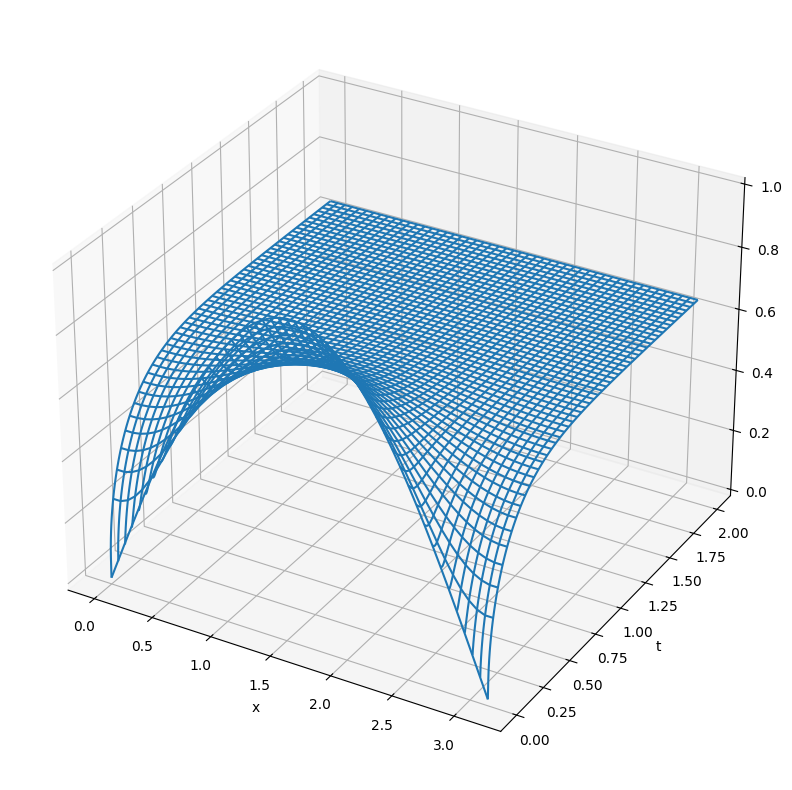

In [3]:
# N tiempo, M espacio

M = 50 # number of grid points for space interval
N = 1000 # number of grid points for time interval

x0 = 0 
xL = np.pi # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 2

dt = (tF - t0) / (N - 1)

D = 1 # thermal diffusivity

a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)

# Initial matrix solution
U = np.zeros((M, N))

# Initial condition
U[:, 0] = np.sin(xspan)

# El algoritmo de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a*U[i-1, k] + (1-2*a)*U[i, k] + a*U[i+1, k]
    U[0,k+1] = U[1,k+1]
    U[-1,k+1] = U[-2,k+1]

Tspan, Xspan = np.meshgrid(tspan, xspan)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

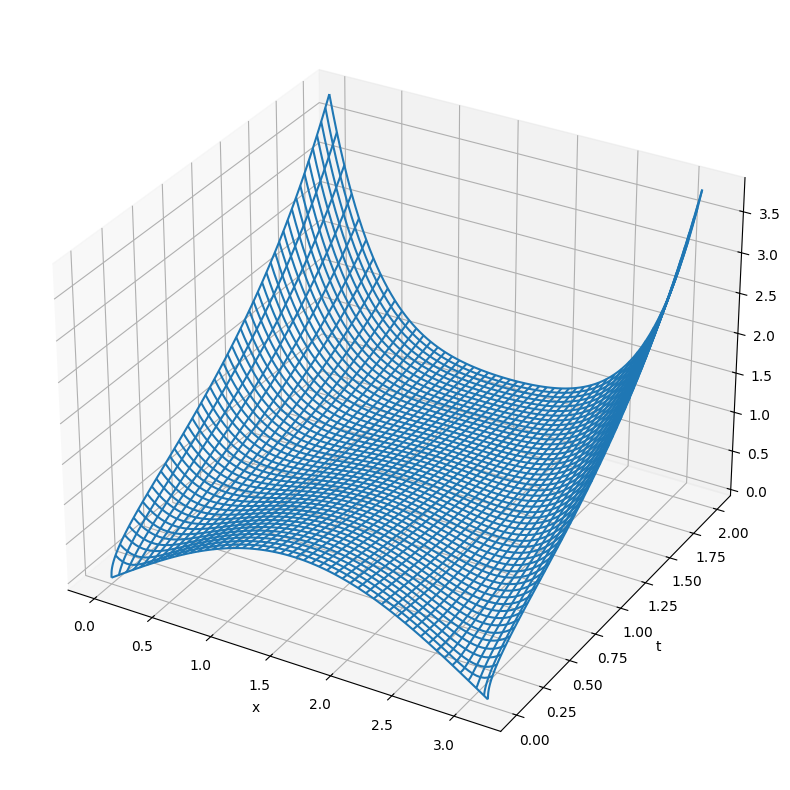

In [4]:
# N tiempo, M espacio

M = 100 # number of grid points for space interval
N = 1000 # number of grid points for time interval

x0 = 0 
xL = np.pi # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 2

dt = (tF - t0) / (N - 1)

D = 0.2 # thermal diffusivity

a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)

# Initial matrix solution
U = np.zeros((M, N))

# Initial condition
U[:, 0] = np.sin(xspan)

# El algoritmo de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]
    U[0,k+1] = U[1,k+1] + dx*np.exp(tspan[k+1])
    U[-1,k+1] = U[-2,k+1] + dx*np.exp(tspan[k+1])

Tspan, Xspan = np.meshgrid(tspan, xspan)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)
plt.xlabel("x")
plt.ylabel("t")

plt.show()